In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd -q ..

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import torch
import lcpfn
from lcpfn import utils

## Example of decreasing curve (lower is better)

In [5]:
x = torch.arange(1, 50)

In [6]:
y = torch.exp(-x / 10) + 0.2

In [7]:
normalizer = utils.pfn_normalize(lb=torch.tensor(0.2), ub=torch.tensor(1.4), soft_lb=0.2, soft_ub=1, minimize=True)

Text(0.5, 1.0, 'After normalization')

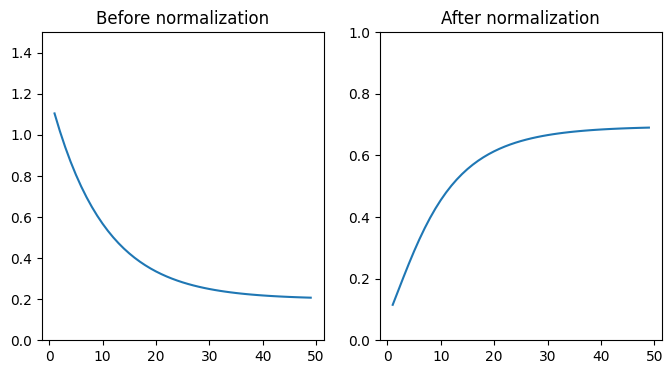

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(x, y)
axes[0].set_ylim(0, 1.5)
axes[0].set_title("Before normalization")

plt.plot(x, normalizer[0](y))
axes[1].set_ylim(0, 1)
axes[1].set_title("After normalization")

## Extrapolation with normalization

In [9]:
model = lcpfn.LCPFN()

In [10]:
cutoff = 10

In [11]:
predictions_wo_normalization = model.predict_quantiles(x_train=x[:cutoff].unsqueeze(1), y_train=y[:cutoff].unsqueeze(1), x_test=x[cutoff:].unsqueeze(1), qs=[0.05, 0.5, 0.95])
predictions_w_normalization = model.predict_quantiles(x_train=x[:cutoff].unsqueeze(1), y_train=y[:cutoff].unsqueeze(1), x_test=x[cutoff:].unsqueeze(1), qs=[0.05, 0.5, 0.95], normalizer=normalizer) # inference including normalizer as parameter

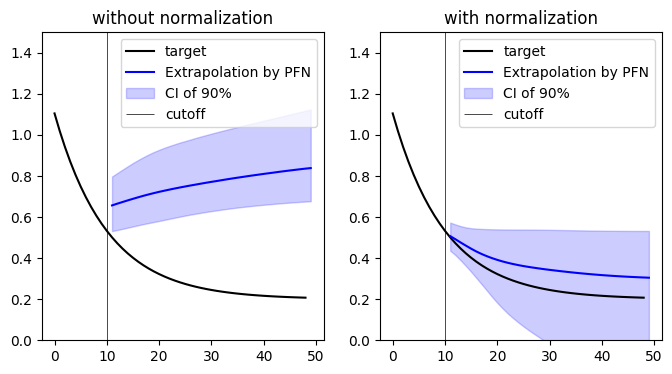

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i, (ax, predictions) in enumerate(zip(axes, [predictions_wo_normalization, predictions_w_normalization])):
    # plot data
    ax.plot(y, "black", label="target")

    # plot extrapolation
    ax.plot(x[cutoff:], predictions[:, 1], "blue", label="Extrapolation by PFN")
    ax.fill_between(
            x[cutoff:].flatten(), predictions[:, 0], predictions[:, 2], color="blue", alpha=0.2, label="CI of 90%"
    )

    # plot cutoff
    ax.vlines(cutoff, 0, 1.5, linewidth=0.5, color="k", label="cutoff")
    ax.set_ylim(0, 1.5)
    ax.legend(loc="upper right")
    ax.set_title(("without" if i == 0 else "with") + " normalization")